<a href="https://colab.research.google.com/github/EdwinAbdonShayo/Data-Science-AI-Lessons/blob/main/cst3133_obesitydataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CST3133 Coursework 1 - Obesity Dataset

---



## Mount Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Original Dataset File Path

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Advanced stuffs coursework/Datasets/ObesityDataset.csv"
df = pd.read_csv(file_path)

###Change Categorical Values "Yes" and "No" into Boolean

In [ ]:
# List of columns to convert (change these to match your dataset)
columns_to_convert = ["family_history_with_overweight", "High_Calorie_Food", "SMOKE", "Monitor_Calorie_Intake"]

# Convert "yes" to 1 and "no" to 0
df[columns_to_convert] = df[columns_to_convert].replace({"yes": 1, "no": 0})

# Save the modified dataset
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Advanced stuffs coursework/Datasets/ObesityDatasetV1.csv", index=False)

# Display the first few rows to check
print(df.head())

   Gender  Age  Height  Weight  family_history_with_overweight  \
0  Female   21    1.62    64.0                               1   
1  Female   21    1.52    56.0                               1   
2    Male   23    1.80    77.0                               1   
3    Male   27    1.80    87.0                               0   
4    Male   22    1.78    89.8                               0   

   High_Calorie_Food  Vegetable_Consumption  Number_of_Main_Meals  \
0                  0                    2.0                   3.0   
1                  0                    3.0                   3.0   
2                  0                    2.0                   3.0   
3                  0                    3.0                   3.0   
4                  0                    2.0                   1.0   

  Consuming_between_Meals  SMOKE  Water_Intake  Monitor_Calorie_Intake  \
0               Sometimes      0           2.0                       0   
1               Sometimes      1        

<ipython-input-4-a9498f05a9b6>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace({"yes": 1, "no": 0})


### Converting Words into Scales from 0-3

In [ ]:
# List of columns to convert
columns_to_convert = ["Consuming_between_Meals", "Frequency_of_Alcohol"]

# Define mapping
mapping = {"Never": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}

# Apply mapping
df[columns_to_convert] = df[columns_to_convert].replace(mapping)

# Save the modified dataset (optional)
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Advanced stuffs coursework/Datasets/ObesityDatasetV1.csv", index=False)

# Display the first few rows to check
print(df.head())

   Gender  Age  Height  Weight  family_history_with_overweight  \
0  Female   21    1.62    64.0                               1   
1  Female   21    1.52    56.0                               1   
2    Male   23    1.80    77.0                               1   
3    Male   27    1.80    87.0                               0   
4    Male   22    1.78    89.8                               0   

   High_Calorie_Food  Vegetable_Consumption  Number_of_Main_Meals  \
0                  0                    2.0                   3.0   
1                  0                    3.0                   3.0   
2                  0                    2.0                   3.0   
3                  0                    3.0                   3.0   
4                  0                    2.0                   1.0   

  Consuming_between_Meals  SMOKE  Water_Intake  Monitor_Calorie_Intake  \
0                       1      0           2.0                       0   
1                       1      1        

 **@Razeen Please add the datapreprocessing section here where you add noise to the dataset and then remove it like you did previously.
Please use ObesityDataset.csv as it is the original dataset**

In [ ]:
#Add codes here non

## New Dataset Path for ObesityDatasetV1.csv - Working Dataset

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Advanced stuffs coursework/Datasets/ObesityDatasetV1.csv"
df = pd.read_csv(file_path)

## Feature Correlation for all columns in the dataset

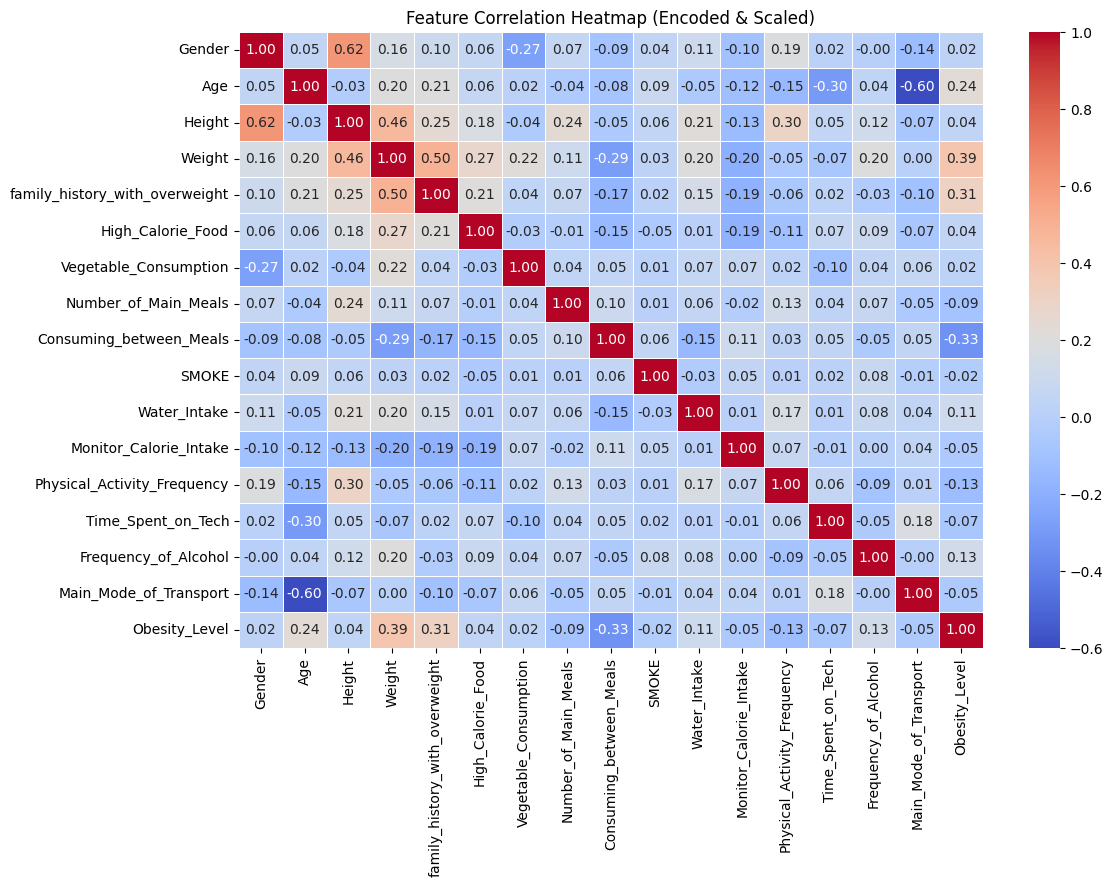

In [ ]:

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Advanced stuffs coursework/Datasets/ObesityDatasetV1.csv"
df = pd.read_csv(file_path)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns  # Categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Numerical columns

# Encode categorical features using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder in case we need to inverse transform later

# Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Encoded & Scaled)")
plt.show()


### Data Distribution Visualisations - Obesity Level VS Weight

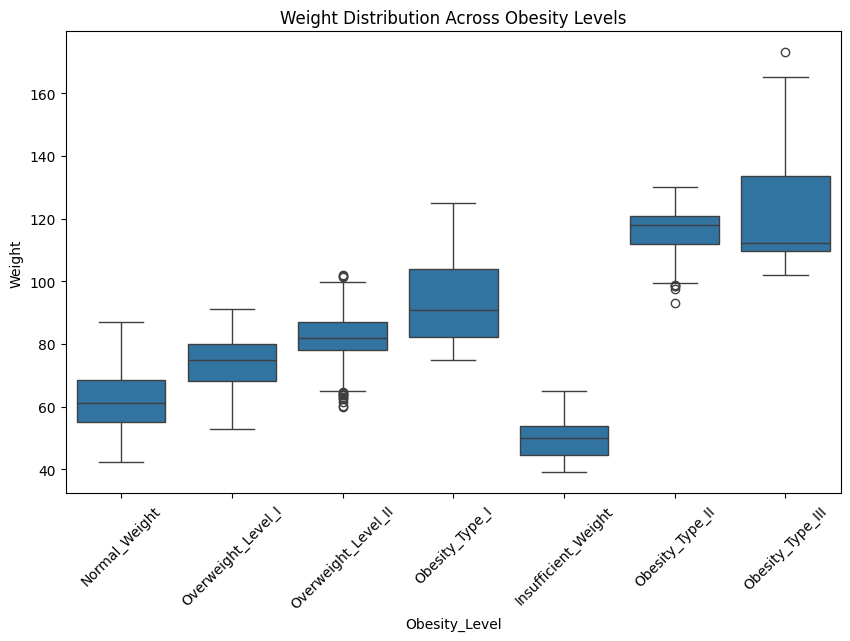

In [ ]:
#The target variable is: Obesity_Level
#The independent variables that are most highly correlated with it according to the heatmap above are:
# Water Intake, High_Calorie_Food, Family_history_with Overweight, Weight, Age, frequency of alcohol
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_Level', y='Weight', data=df)
plt.title('Weight Distribution Across Obesity Levels')
plt.xticks(rotation=45)
plt.show()


### Data Distribution Visualisations - Obesity Level VS High Calorie Food

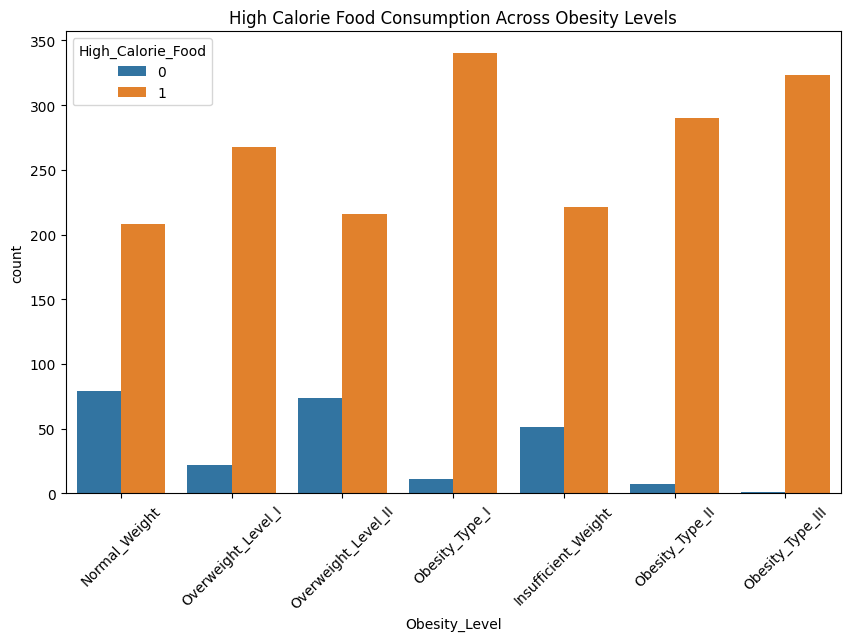

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Obesity_Level', hue='High_Calorie_Food', data=df)
plt.title('High Calorie Food Consumption Across Obesity Levels')
plt.xticks(rotation=45)
plt.show()

### Data Distribution Visualisations - Obesity Level VS Water Intake

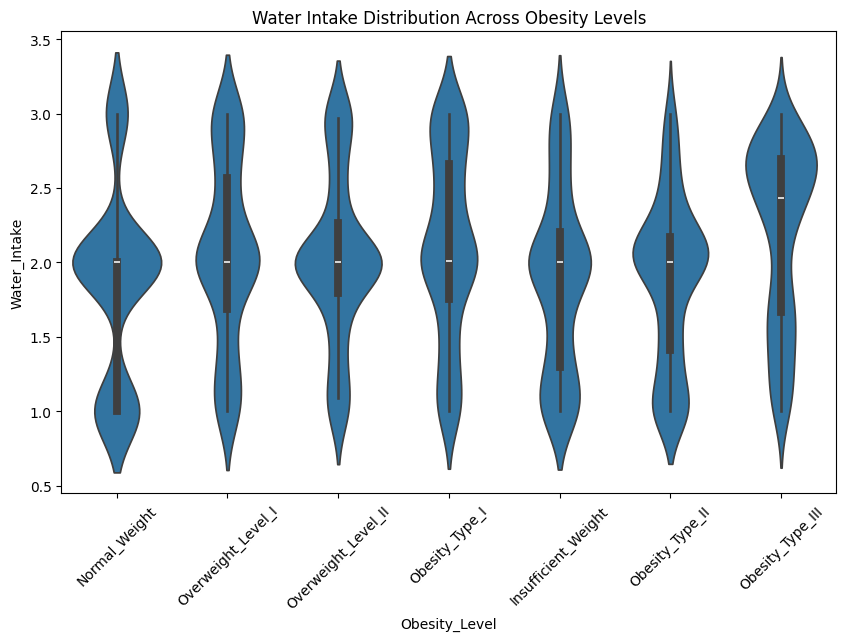

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Obesity_Level', y='Water_Intake', data=df)
plt.title('Water Intake Distribution Across Obesity Levels')
plt.xticks(rotation=45)
plt.show()


### Data Distribution Visualisations - Obesity Level VS Frequency of Alcohol

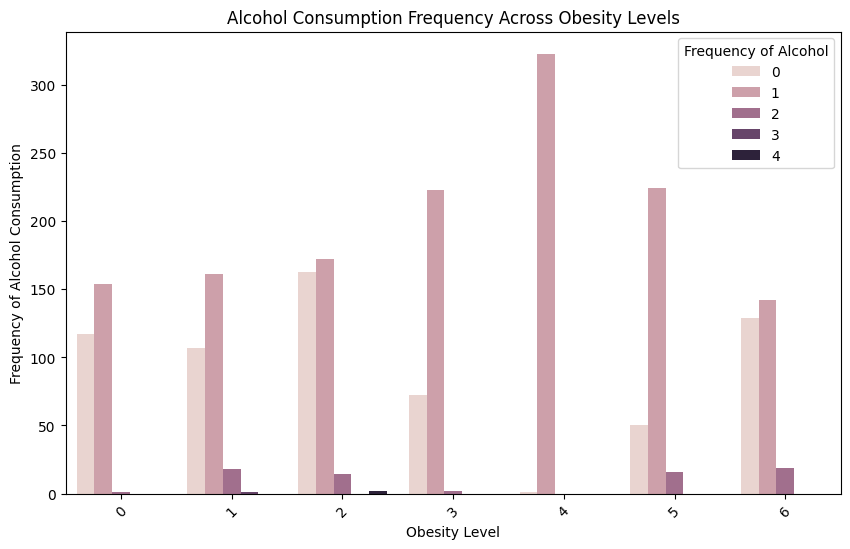

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Obesity_Level', hue='Frequency_of_Alcohol', data=df)

# Add title and labels
plt.title('Alcohol Consumption Frequency Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Frequency of Alcohol Consumption')
plt.xticks(rotation=45)
plt.legend(title='Frequency of Alcohol')

plt.show()

### Skewness and Kurtosis of Independent Variables


In [ ]:
# List of independent variables
independent_vars = ['Water_Intake', 'High_Calorie_Food', 'family_history_with_overweight', 'Weight', 'Age', 'Frequency_of_Alcohol']

# Create a dictionary to store skewness and kurtosis values
skewness_values = {}
kurtosis_values = {}

# Calculate skewness and kurtosis for each variable
for var in independent_vars:
    skewness_values[var] = skew(df[var])
    kurtosis_values[var] = kurtosis(df[var])

# Print the skewness and kurtosis values
print("Skewness Values:", skewness_values)
print("Kurtosis Values:", kurtosis_values)


Skewness Values: {'Water_Intake': np.float64(-0.10495237183806906), 'High_Calorie_Food': np.float64(-2.397420159746575), 'family_history_with_overweight': np.float64(-1.6450458897225377), 'Weight': np.float64(0.25524059695291496), 'Age': np.float64(1.520244920562755), 'Frequency_of_Alcohol': np.float64(-0.23305522529402645)}
Kurtosis Values: {'Water_Intake': np.float64(-0.8800135567872207), 'High_Calorie_Food': np.float64(3.7476234223592932), 'family_history_with_overweight': np.float64(0.7061759792930165), 'Weight': np.float64(-0.7010675334104985), 'Age': np.float64(2.789116739491151), 'Frequency_of_Alcohol': np.float64(-0.3347664437216169)}


####Normal Distribution Curves to visualise Skewness and Kurtosis

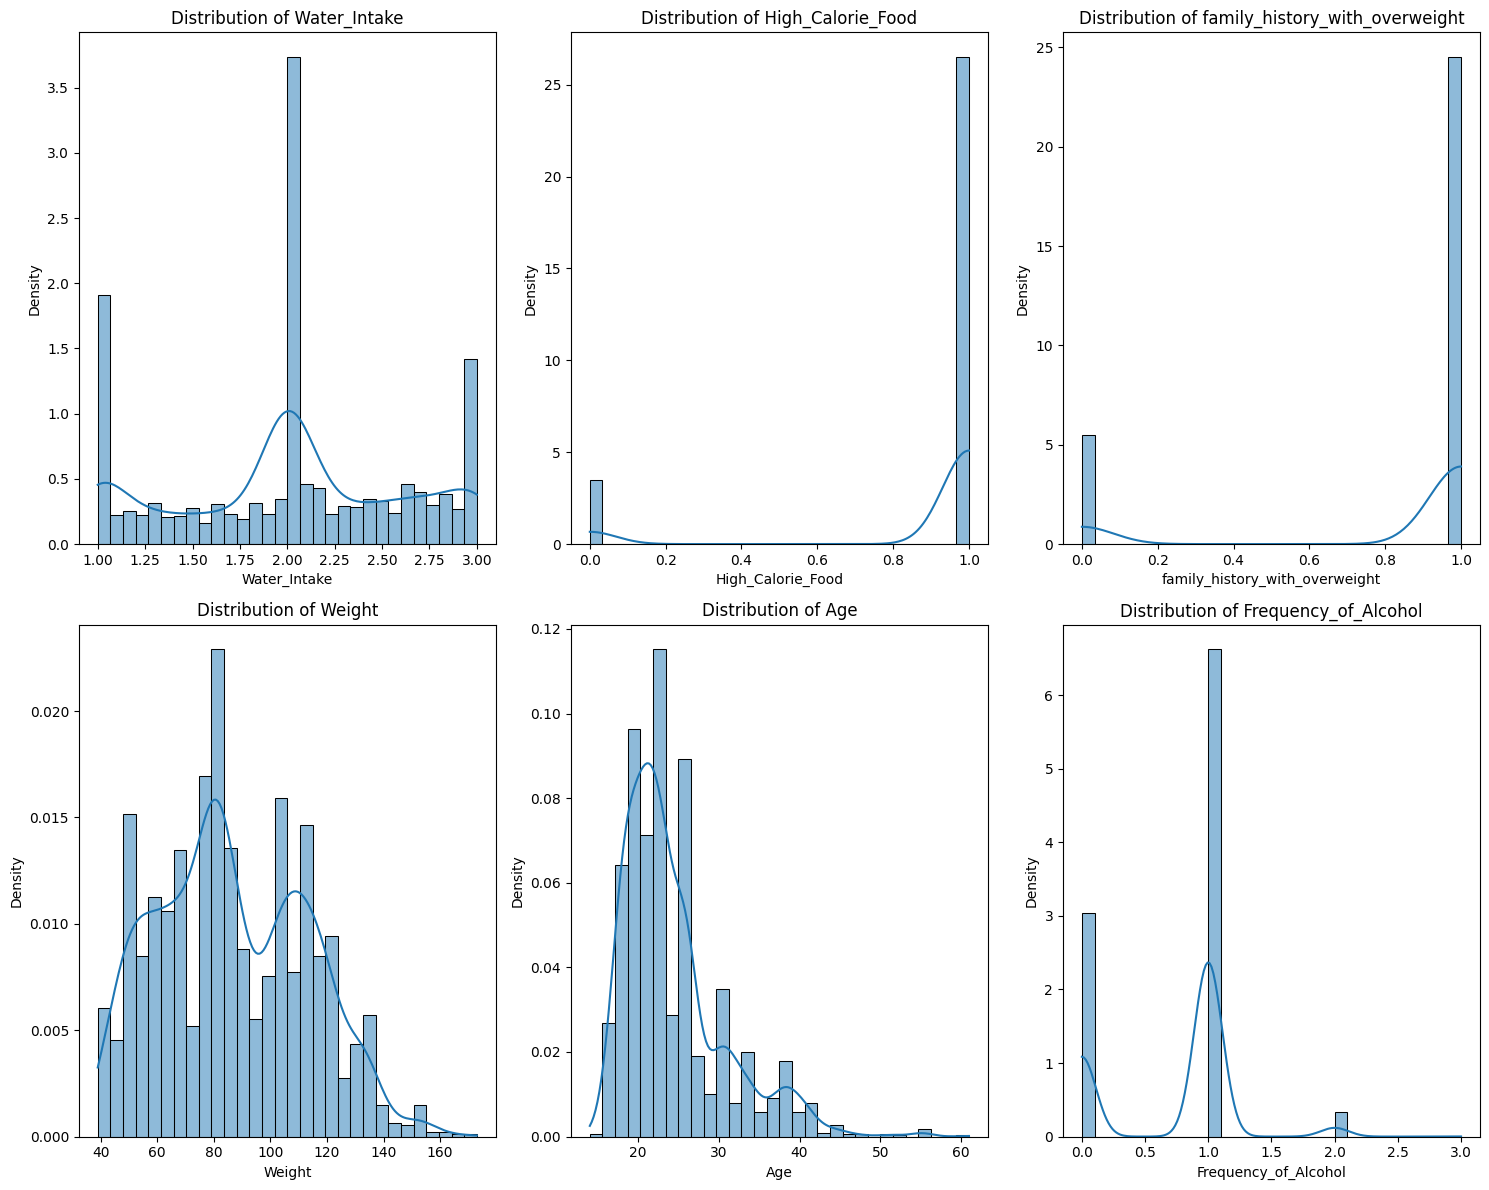

In [ ]:
# Set up the plotting area
plt.figure(figsize=(15, 12))

# Loop through each variable to plot their distributions
for i, var in enumerate(independent_vars, 1):
    plt.subplot(2, 3, i)  # Create subplots (2 rows, 3 columns)
    sns.histplot(df[var], kde=True, stat='density', bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


## K-Means Clustering Algorithm

In [ ]:
# Encode the target variable 'Obesity_Level' (assuming it's categorical)
# Use label encoding or one-hot encoding based on the type of analysis you want
df['Obesity_Level'] = df['Obesity_Level'].astype('category').cat.codes

# Select the independent variables for clustering
independent_vars = ['Water_Intake', 'High_Calorie_Food', 'family_history_with_overweight', 'Weight', 'Age', 'Frequency_of_Alcohol']
X = df[independent_vars]

# Normalize the data (scaling the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Finding Optimal Value of k using Elbow Method

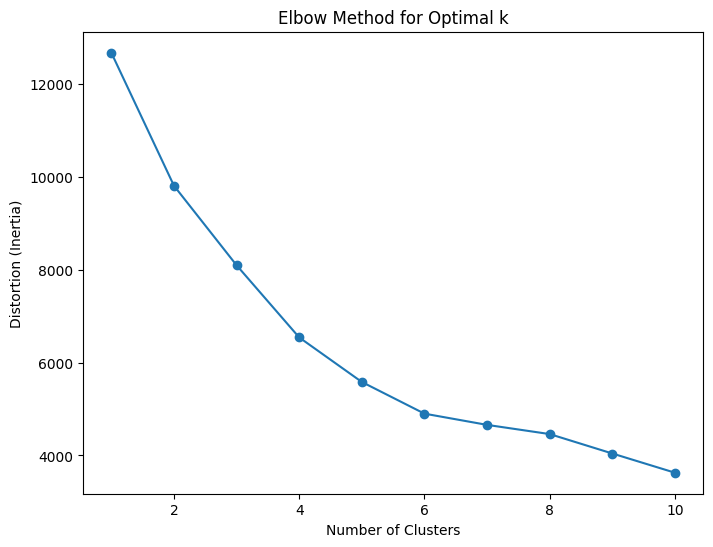

In [ ]:
# Calculate distortions for different k values (range from 1 to 10)
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.show()


### Performing K Means - 6 Clusters

In [ ]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster_Label'] = kmeans.fit_predict(X_scaled)

# Display the first few rows to check the new cluster labels
print(df[['Obesity_Level', 'Cluster_Label']].head())


   Obesity_Level  Cluster_Label
0              1              2
1              1              2
2              1              2
3              5              2
4              6              2


### Clusters Visualisation

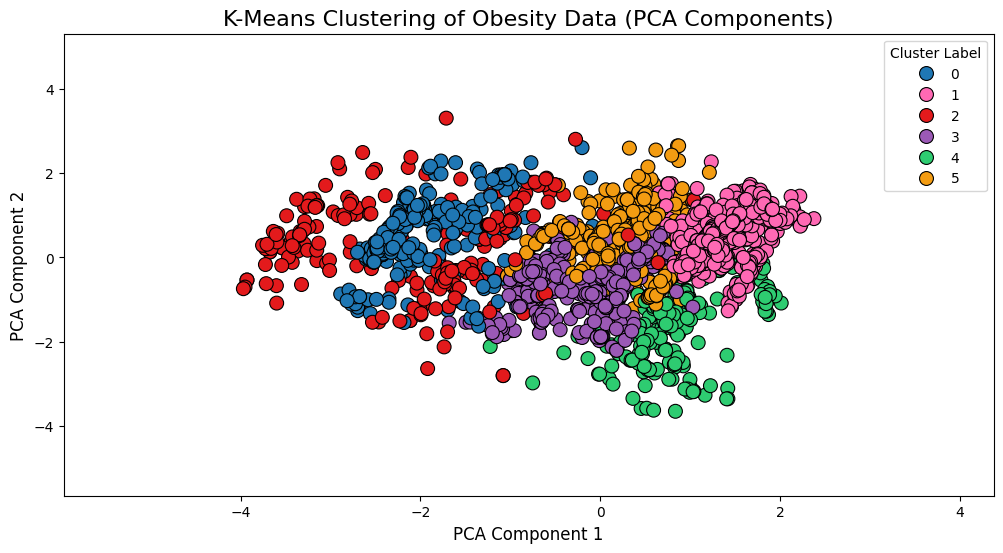

In [ ]:
# Define custom colors for the 6 clusters (do not choose #00000)
custom_colors = ['#1f77b4', '#ff69b4', '#e31a1c', '#9b59b6', '#2ecc71', '#f39c12']  # Blue, Pink, Red, Purple, Green, Orange

# Scatter plot with custom colors
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster_Label'], palette=custom_colors, s=100, edgecolor='black')

plt.title('K-Means Clustering of Obesity Data (PCA Components)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Adjust axis limits
plt.xlim(X_pca[:, 0].min() - 2, X_pca[:, 0].max() + 2)
plt.ylim(X_pca[:, 1].min() - 2, X_pca[:, 1].max() + 2)

plt.legend(title='Cluster Label')

plt.show()


## Random Forest Classification Algorithm - All columns in the Dataset

Model Accuracy: 0.9480


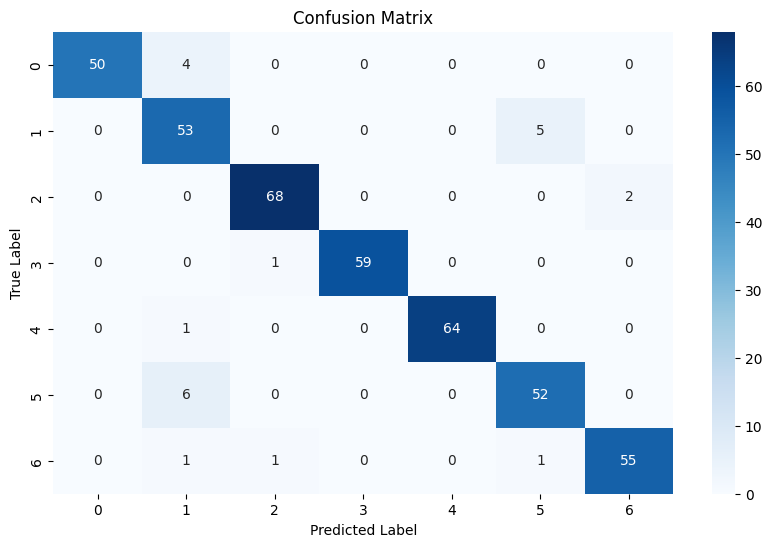

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.82      0.91      0.86        58
           2       0.97      0.97      0.97        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.90      0.90      0.90        58
           6       0.96      0.95      0.96        58

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



In [ ]:

# Define independent (X) and dependent (y) variables
X = df.drop(columns=['Obesity_Level'])  # Independent variables
y = df['Obesity_Level']  # Target variable

# Label encoding for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


### Random Forest Classification Algorithm - Selected Independent Variables

Model Accuracy: 0.8629

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        54
           1       0.75      0.79      0.77        58
           2       0.88      0.83      0.85        70
           3       1.00      0.97      0.98        60
           4       0.97      0.98      0.98        65
           5       0.75      0.83      0.79        58
           6       0.77      0.76      0.77        58

    accuracy                           0.86       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.87      0.86      0.86       423



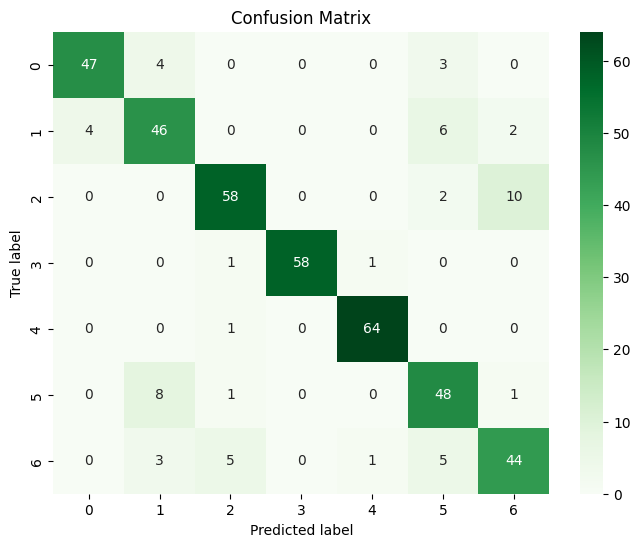

In [ ]:
# Define selected independent variables
selected_features = ['Water_Intake', 'High_Calorie_Food', 'family_history_with_overweight', 'Weight', 'Age', 'Frequency_of_Alcohol']

# Create feature matrix (X) and target variable (y)
X = df[selected_features]  # Use only selected features
y = df['Obesity_Level']  # Target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Greens", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Model with Hyperparameter Tuning and Feature Selection


Feature Importance Scores:
                           Feature  Importance
3                           Weight    0.337391
2                           Height    0.098921
6            Vegetable_Consumption    0.090330
1                              Age    0.084049
0                           Gender    0.056869
7             Number_of_Main_Meals    0.053055
13              Time_Spent_on_Tech    0.049571
12     Physical_Activity_Frequency    0.044710
10                    Water_Intake    0.042458
8          Consuming_between_Meals    0.034790
14            Frequency_of_Alcohol    0.032990
4   family_history_with_overweight    0.030120
15          Main_Mode_of_Transport    0.019940
5                High_Calorie_Food    0.017270
11          Monitor_Calorie_Intake    0.005714
9                            SMOKE    0.001821

Selected Features: ['Weight', 'Height', 'Vegetable_Consumption', 'Age', 'Gender', 'Number_of_Main_Meals', 'Time_Spent_on_Tech', 'Physical_Activity_Frequency']

Best Hyperpa

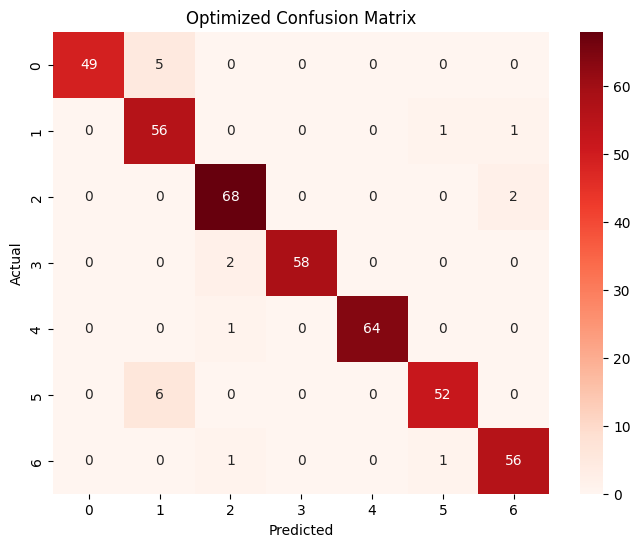

In [ ]:

# Define Features (All Columns Except Target Variable)
X = df.drop(columns=['Obesity_Level'])  # All independent variables
y = df['Obesity_Level']  # Target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Step 1: Train Model & Get Feature Importance**
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
base_model.fit(X_train, y_train)

# Extract feature importances
importances = base_model.feature_importances_
feature_names = X.columns

# Create a DataFrame of feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance Scores:")
print(feature_importance_df)

### **Step 2: Select Only the Top N Features**
top_n = 8  # Keep only the top 8 most important features
selected_features = feature_importance_df['Feature'][:top_n].tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"\nSelected Features: {selected_features}")

### **Step 3: Hyperparameter Tuning with GridSearchCV**
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters: {best_params}")

### **Step 4: Train Optimized Model with Best Features & Parameters**
optimized_model = RandomForestClassifier(**best_params, random_state=42)
optimized_model.fit(X_train_selected, y_train)

# Make Predictions
y_pred = optimized_model.predict(X_test_selected)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOptimized Model Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization (Green Color)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds",
            xticklabels=optimized_model.classes_, yticklabels=optimized_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized Confusion Matrix")
plt.show()
